# 0. Simulate real signal data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

%matplotlib inline
%config InlineBackend.figure_format='retina'

## 0.1 Pure signal data

Text(0, 0.5, 'amplitude')

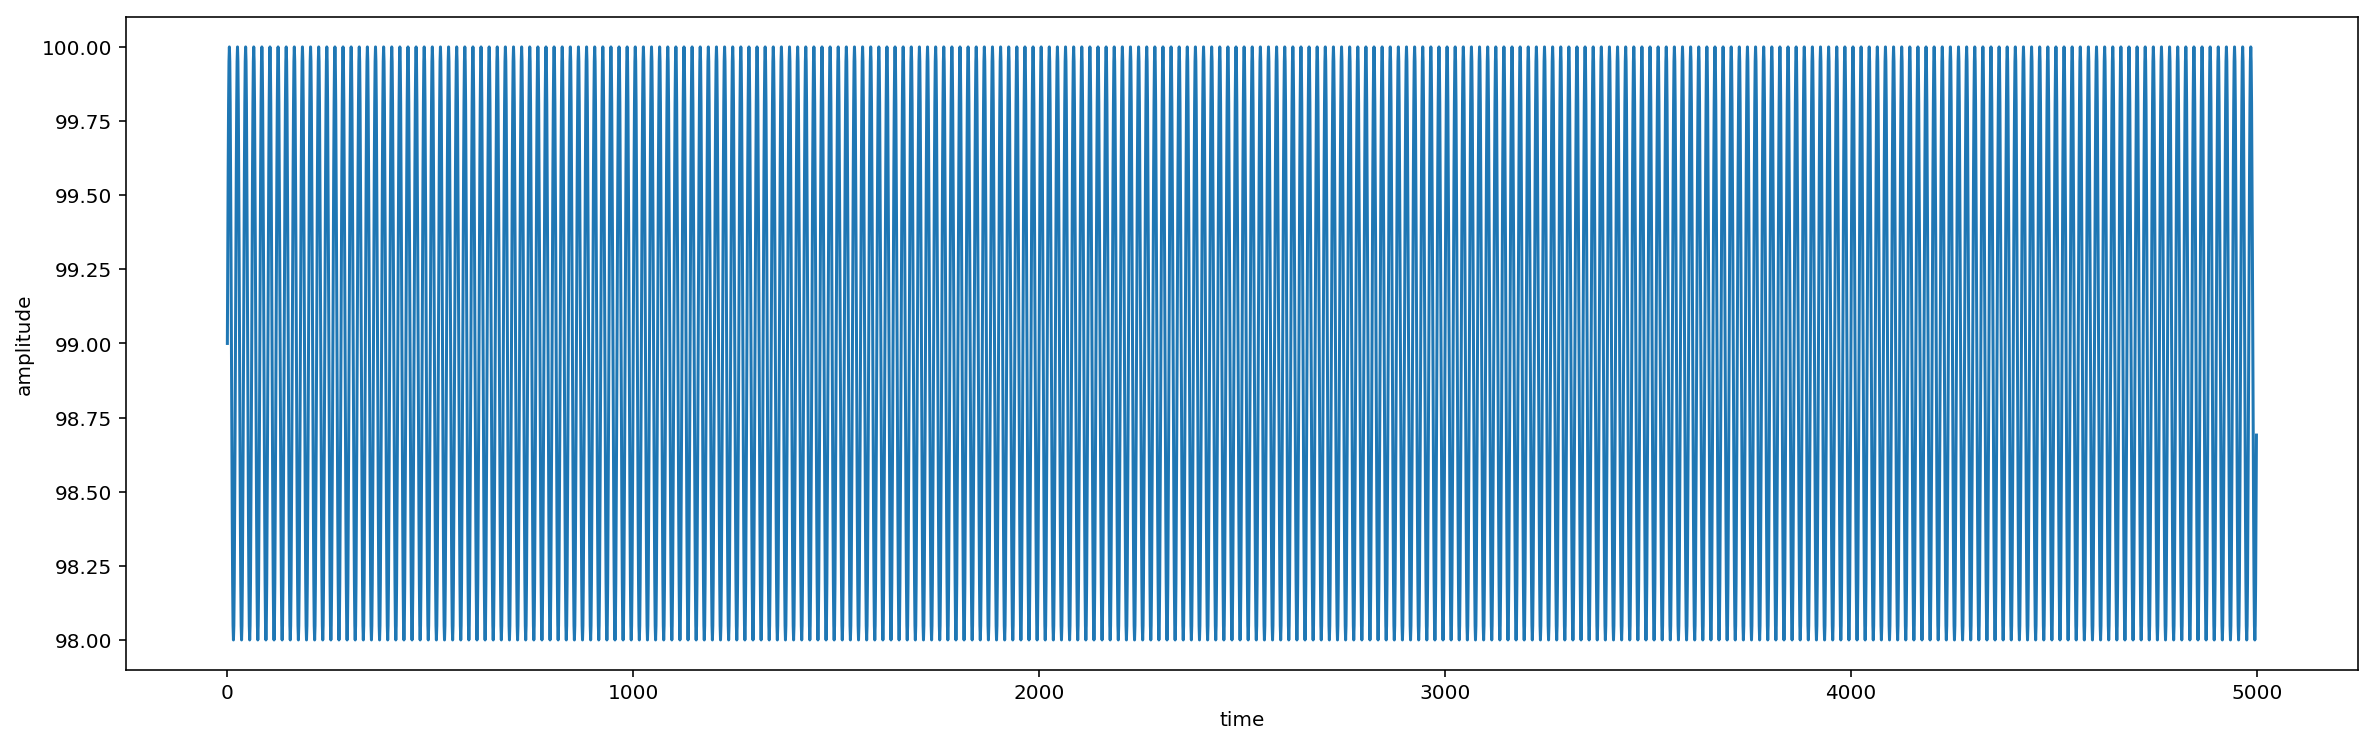

In [2]:
# define parameters
time=5000
x =np.arange(time)
freq = 10

# sine wave
ps=np.sin(2*np.pi*freq*(x/200))+99

plt.figure(figsize=(20,6))
plt.plot(x,ps)
plt.xlabel('time')
plt.ylabel('amplitude')

## 0.2 Noise form

Text(0, 0.5, 'amplitude')

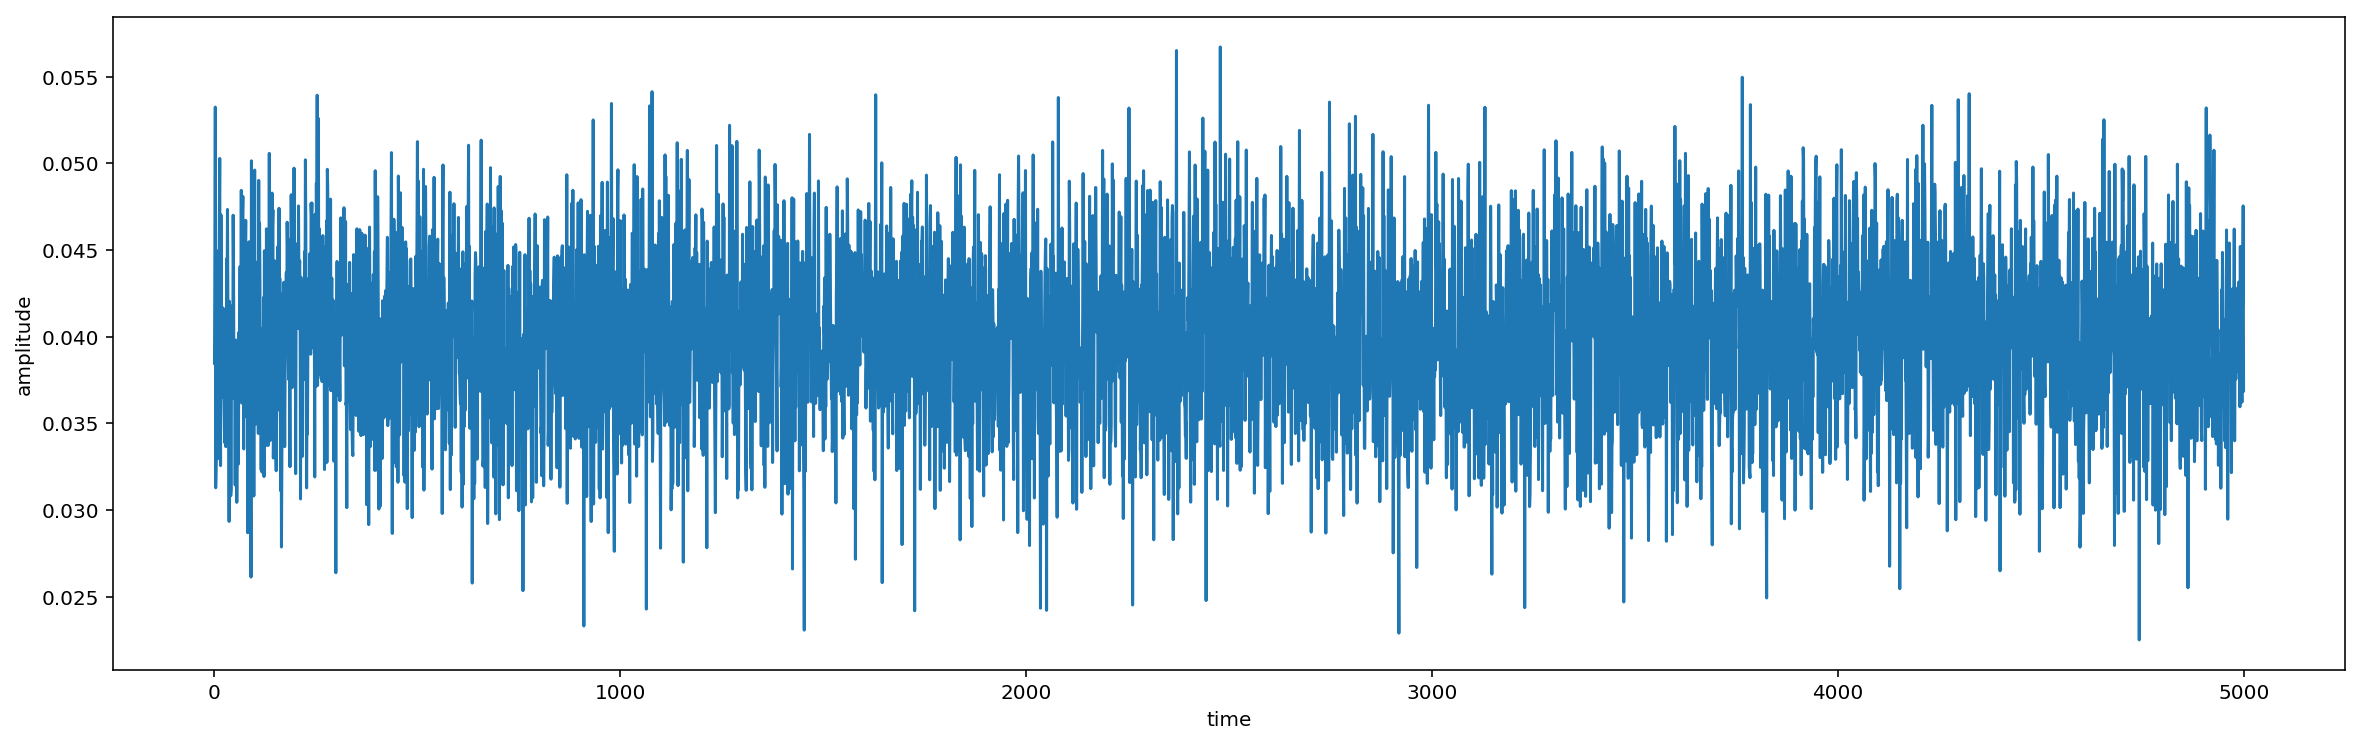

In [3]:
#rd=np.random.normal(size=time,)
#nf=(np.max(rd)-rd)/100
nf=np.random.normal(.04,.005,time)

plt.figure(figsize=(20,6))
plt.plot(nf)
plt.xlabel('time')
plt.ylabel('amplitude')

## 0.3 Atmos signal data  = Pure + Noise

Text(0, 0.5, 'amplitude')

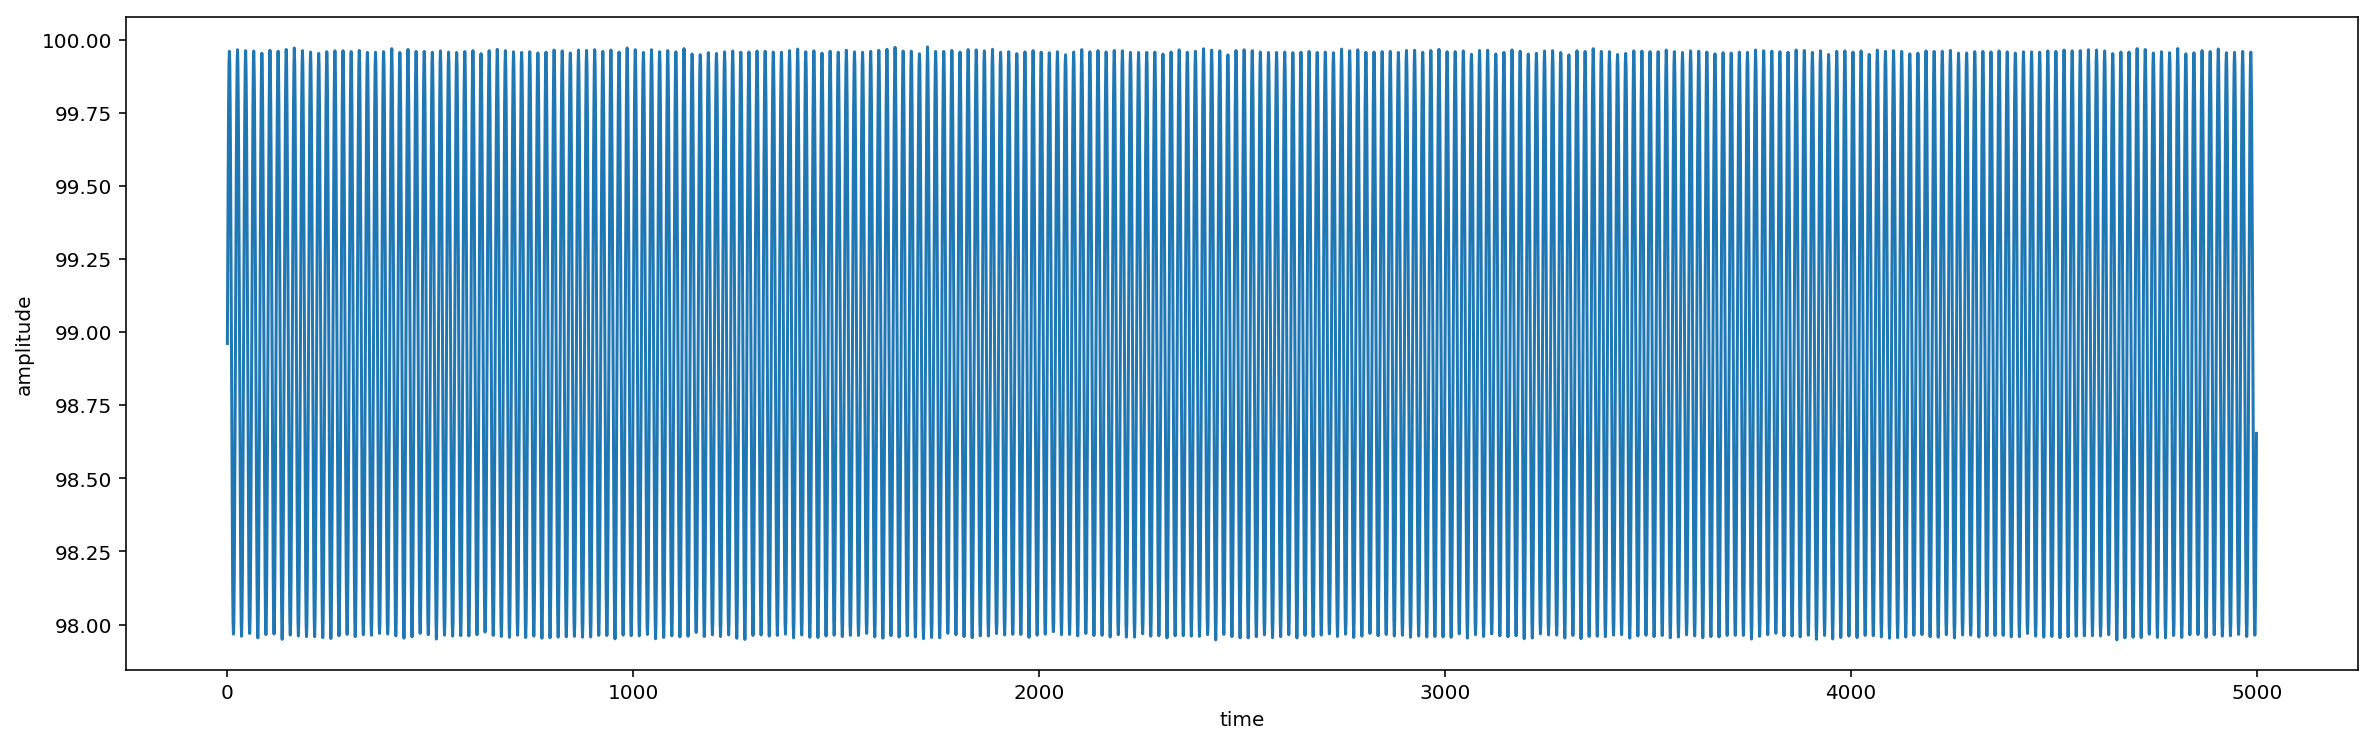

In [4]:
at = -nf+ps

plt.figure(figsize=(20,6))
plt.plot(x,at)
plt.xlabel('time')
plt.ylabel('amplitude')

(0, 100)

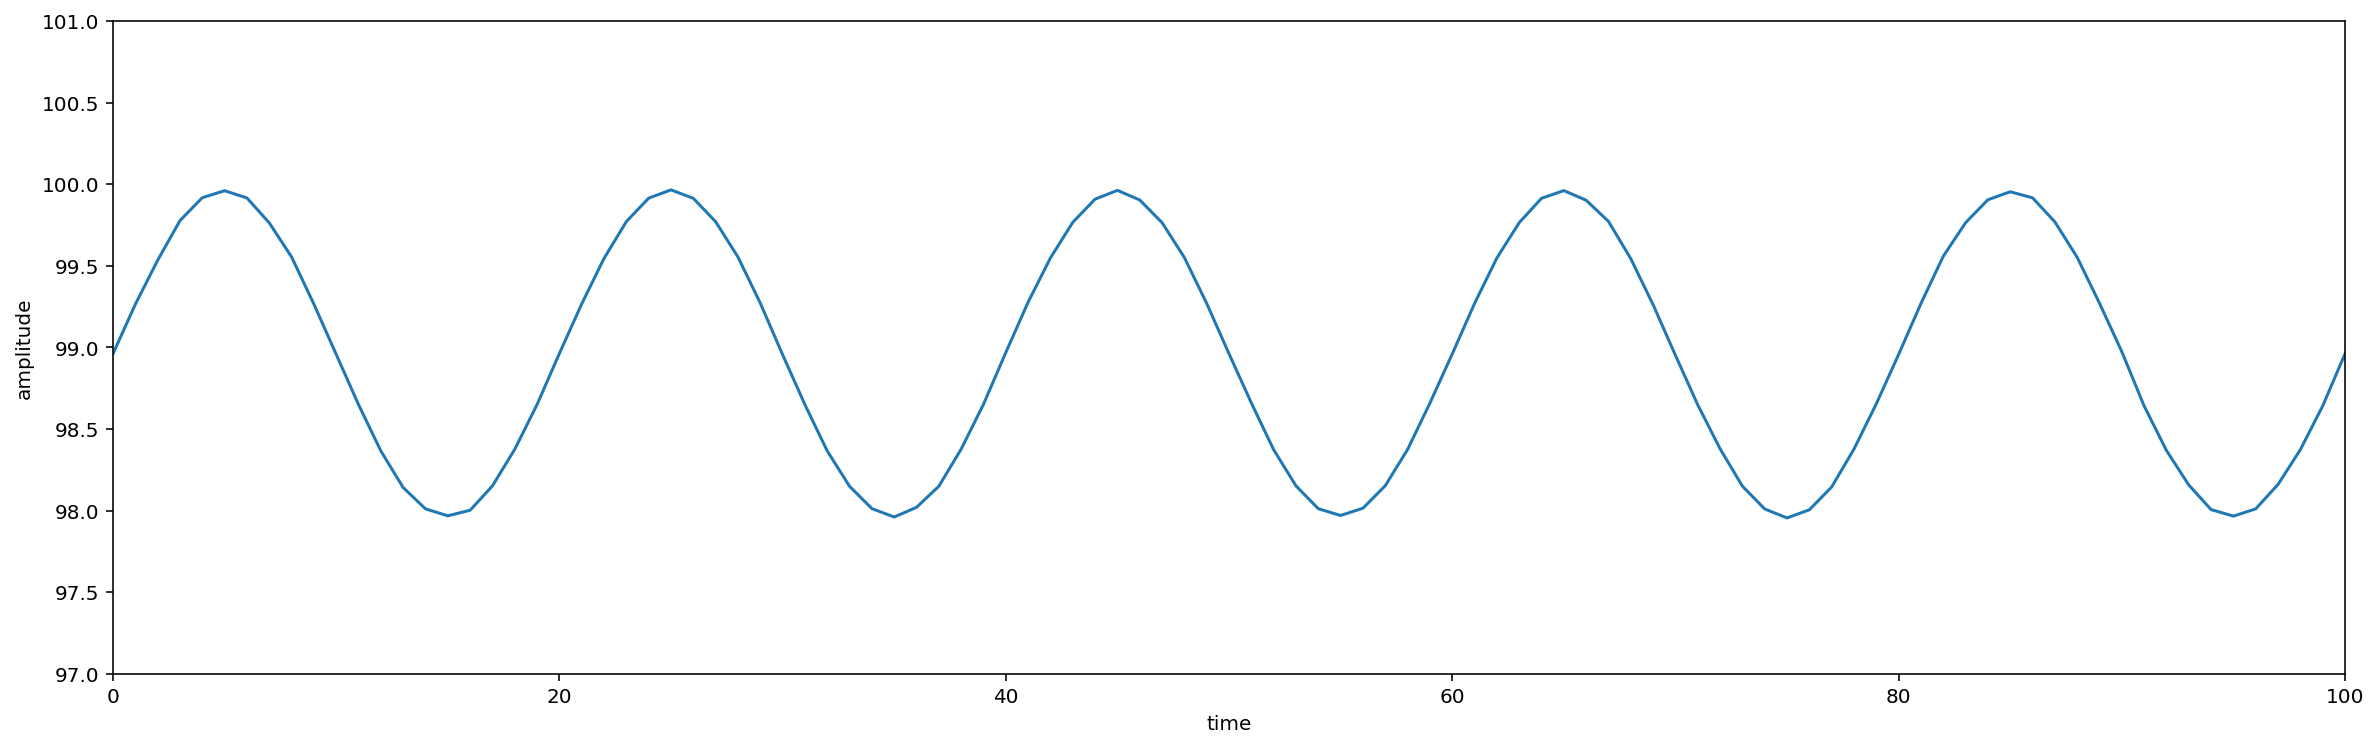

In [5]:
plt.figure(figsize=(20,6))
plt.plot(x,at)
plt.xlabel('time')
plt.ylabel('amplitude')

plt.ylim(97,101)
plt.xlim(0,100)

## 0.4 Lose form

In [6]:
#parameters
sigma=50 #50
mu=100 #100
sizeLoss=10000 #10000
#time parameter
x=np.arange(-(time-(time-mu)),(time-mu))
#x=np.arange(-100,10000)
#print(x.size)

#gausian distribution
#ga=((1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2)))
gau=-((1/np.sqrt(2*np.pi*sigma**2))*np.exp((-(x-mu)**2)/(2*sigma**2)))*sizeLoss
print(gau)
print(x)

[-0.02676605 -0.02898951 -0.03138513 ... -0.         -0.
 -0.        ]
[-100  -99  -98 ... 4897 4898 4899]


Text(0, 0.5, 'loss signal data')

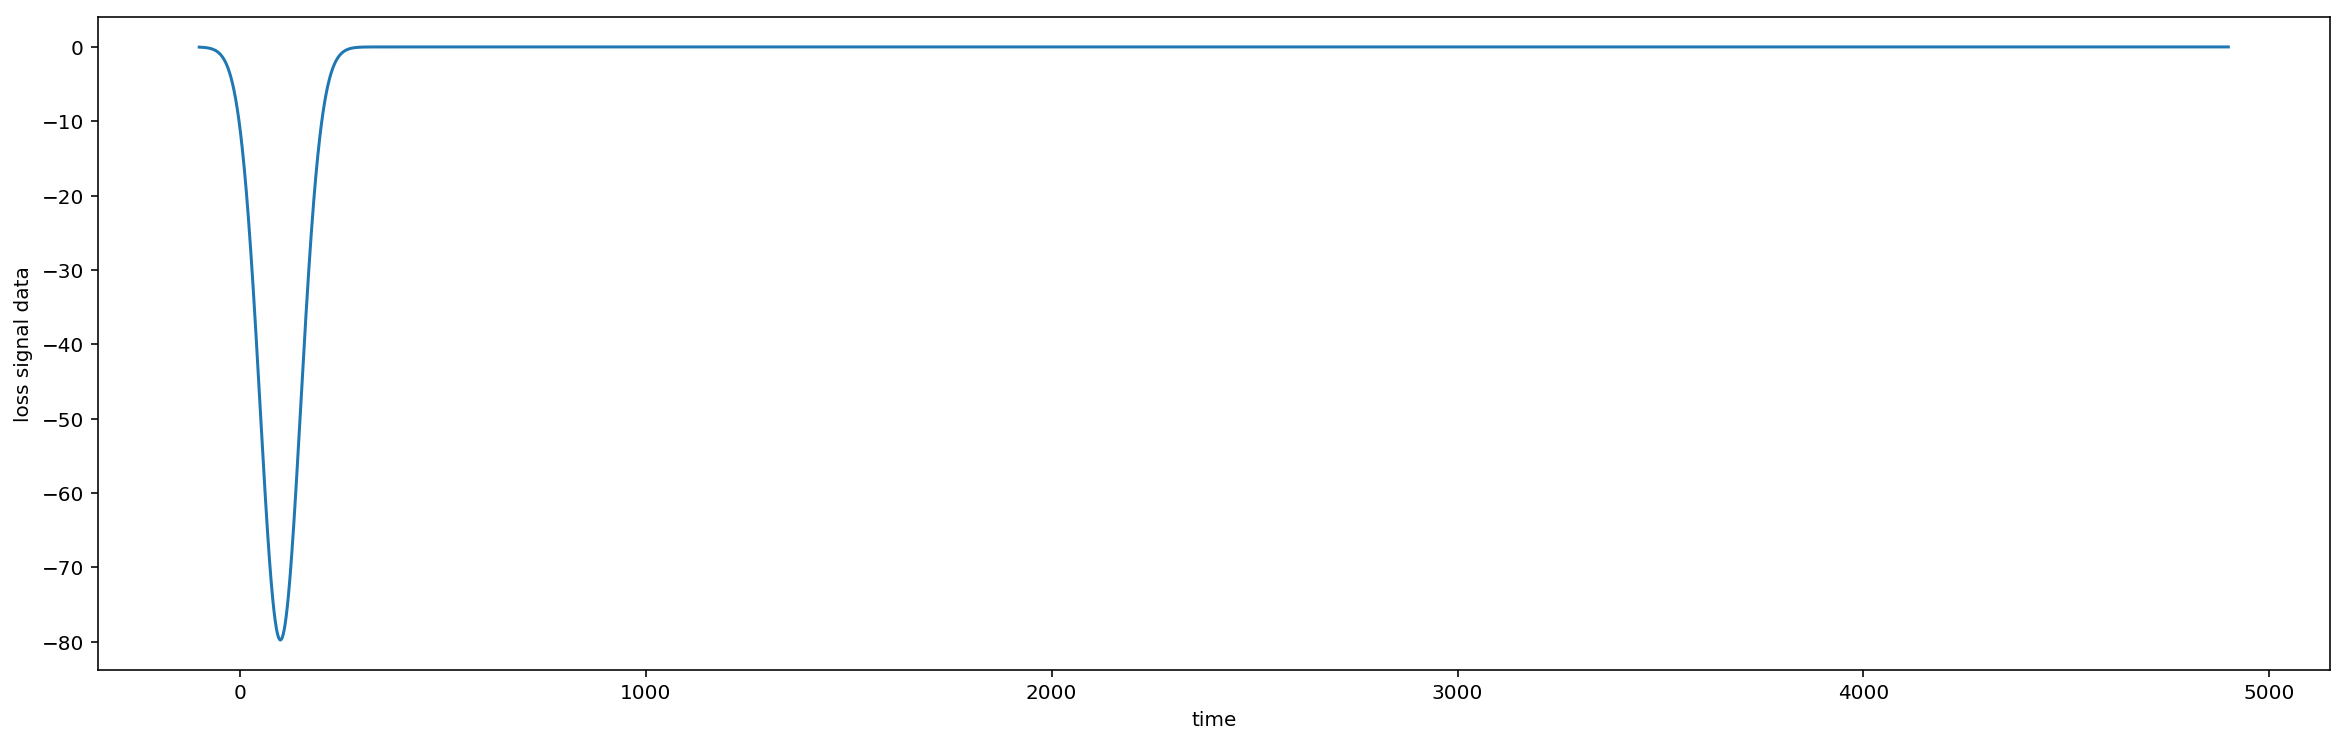

In [7]:
plt.figure(figsize=(20,6))
plt.plot(x,gau)
plt.xlabel('time')
plt.ylabel('loss signal data')

# 0.5 Real signal data

Text(0, 0.5, 'loss signal data')

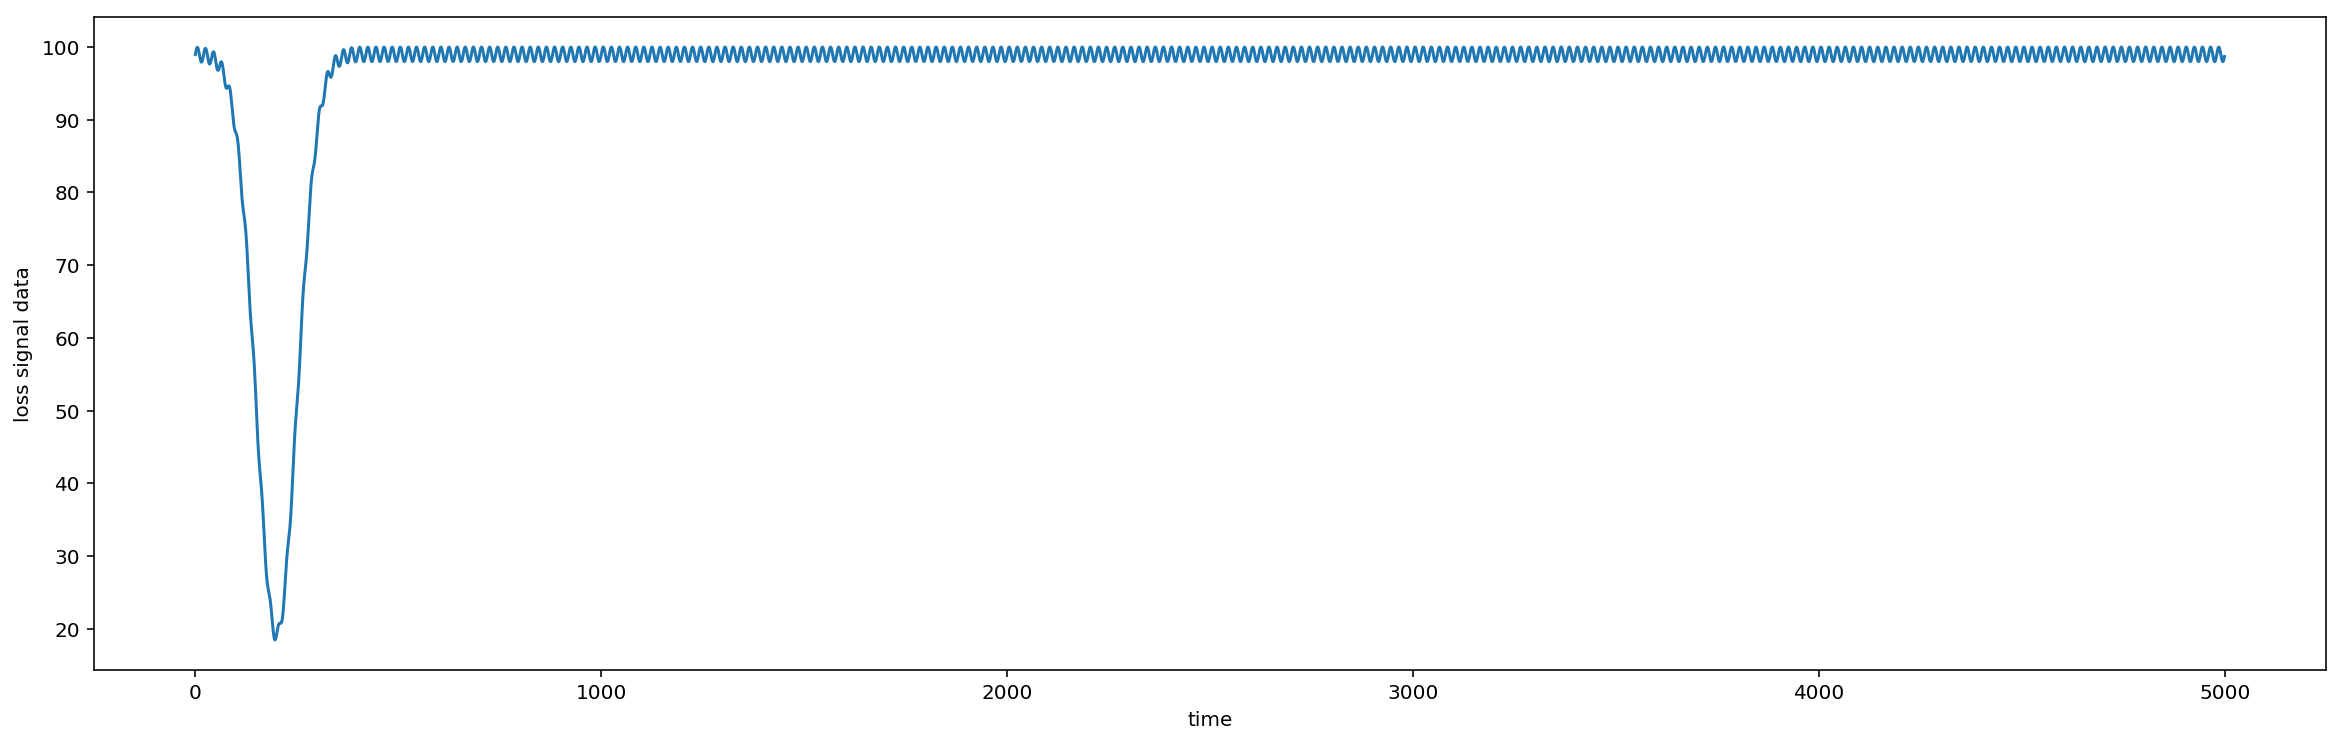

In [8]:
real=at+gau

plt.figure(figsize=(20,6))
plt.plot(real)
plt.xlabel('time')
plt.ylabel('loss signal data')

In [9]:
np.max(real)

99.9758075889917

# 1. Statistical analysis of the signal

## 1.1 Atmos signal data

Text(0, 0.5, 'amplitude')

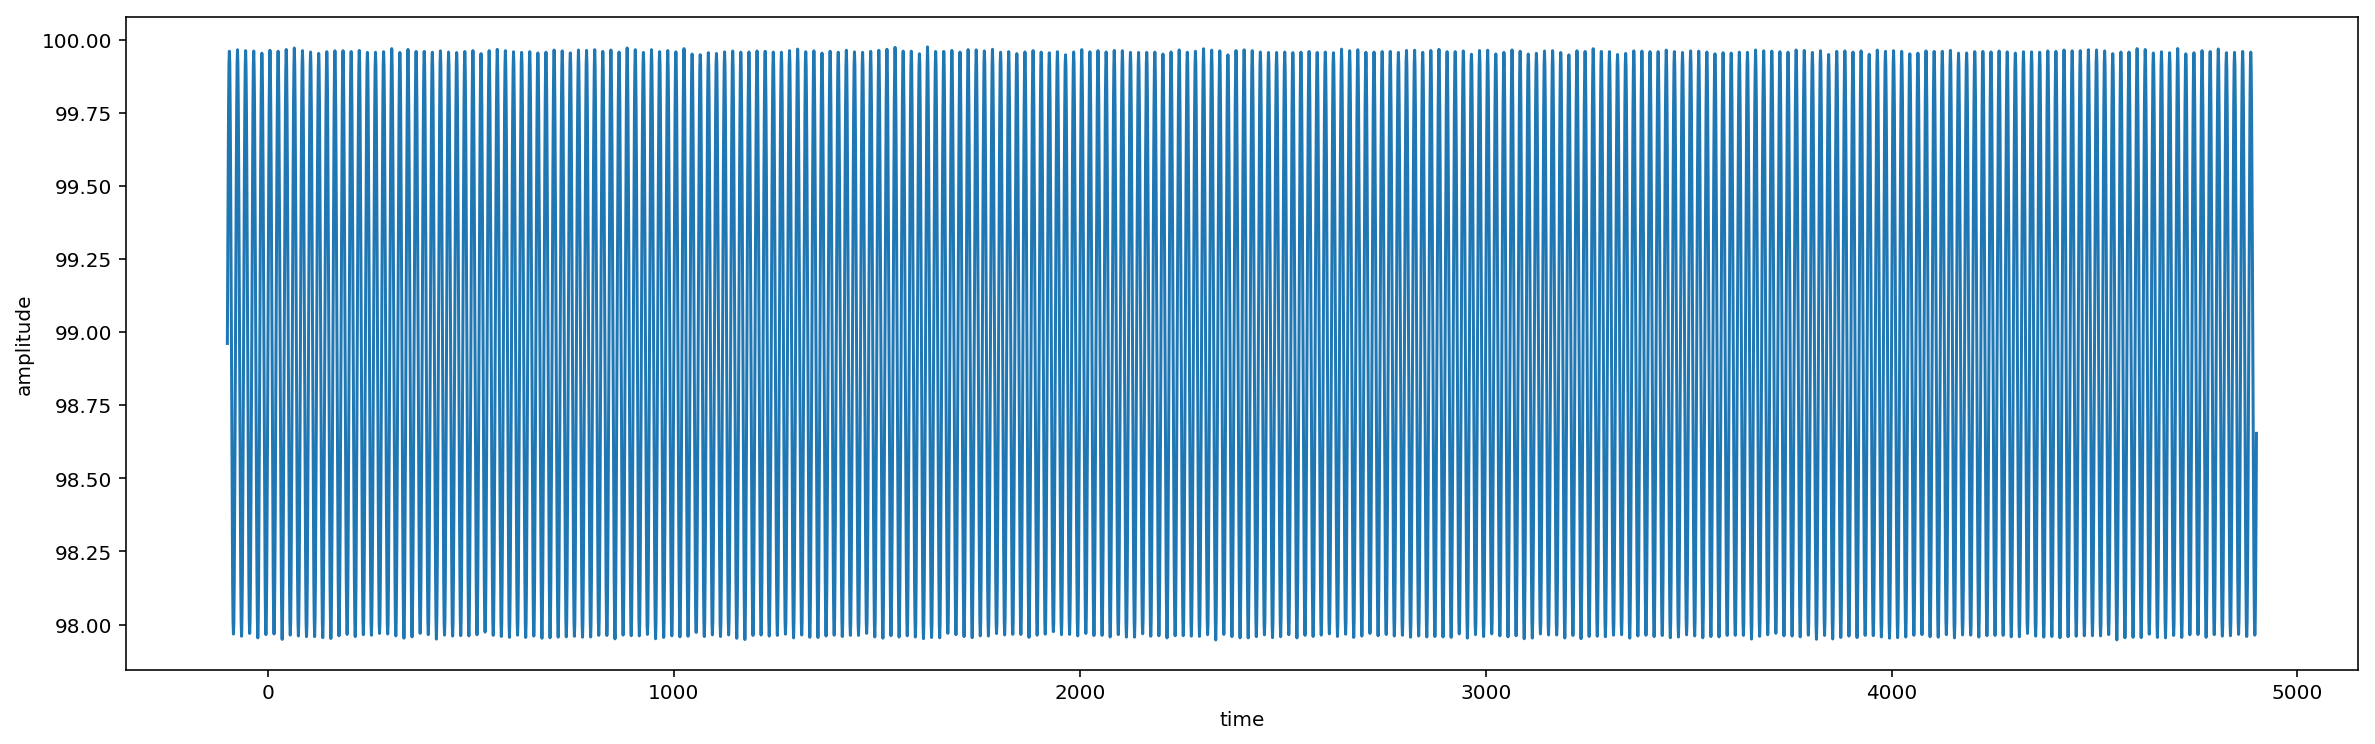

In [10]:
plt.figure(figsize=(20,6))
plt.plot(x,at)
plt.xlabel('time')
plt.ylabel('amplitude')

In [11]:
at_max=np.max(at)
at_mean=np.mean(at)
at_min=np.min(at)
at_std=np.std(at)

print('Max of Atmo = '+ str(at_max))
print('Mean of Atmo = '+ str(at_mean))
print('Min of Atmo = '+ str(at_min))
print('Std of Atmo = '+ str(at_std))

Max of Atmo = 99.9758075889917
Mean of Atmo = 98.96004726907537
Min of Atmo = 97.94739491426797
Std of Atmo = 0.7071668757651867


# 1.2 Real signal data

Text(0, 0.5, 'loss signal data')

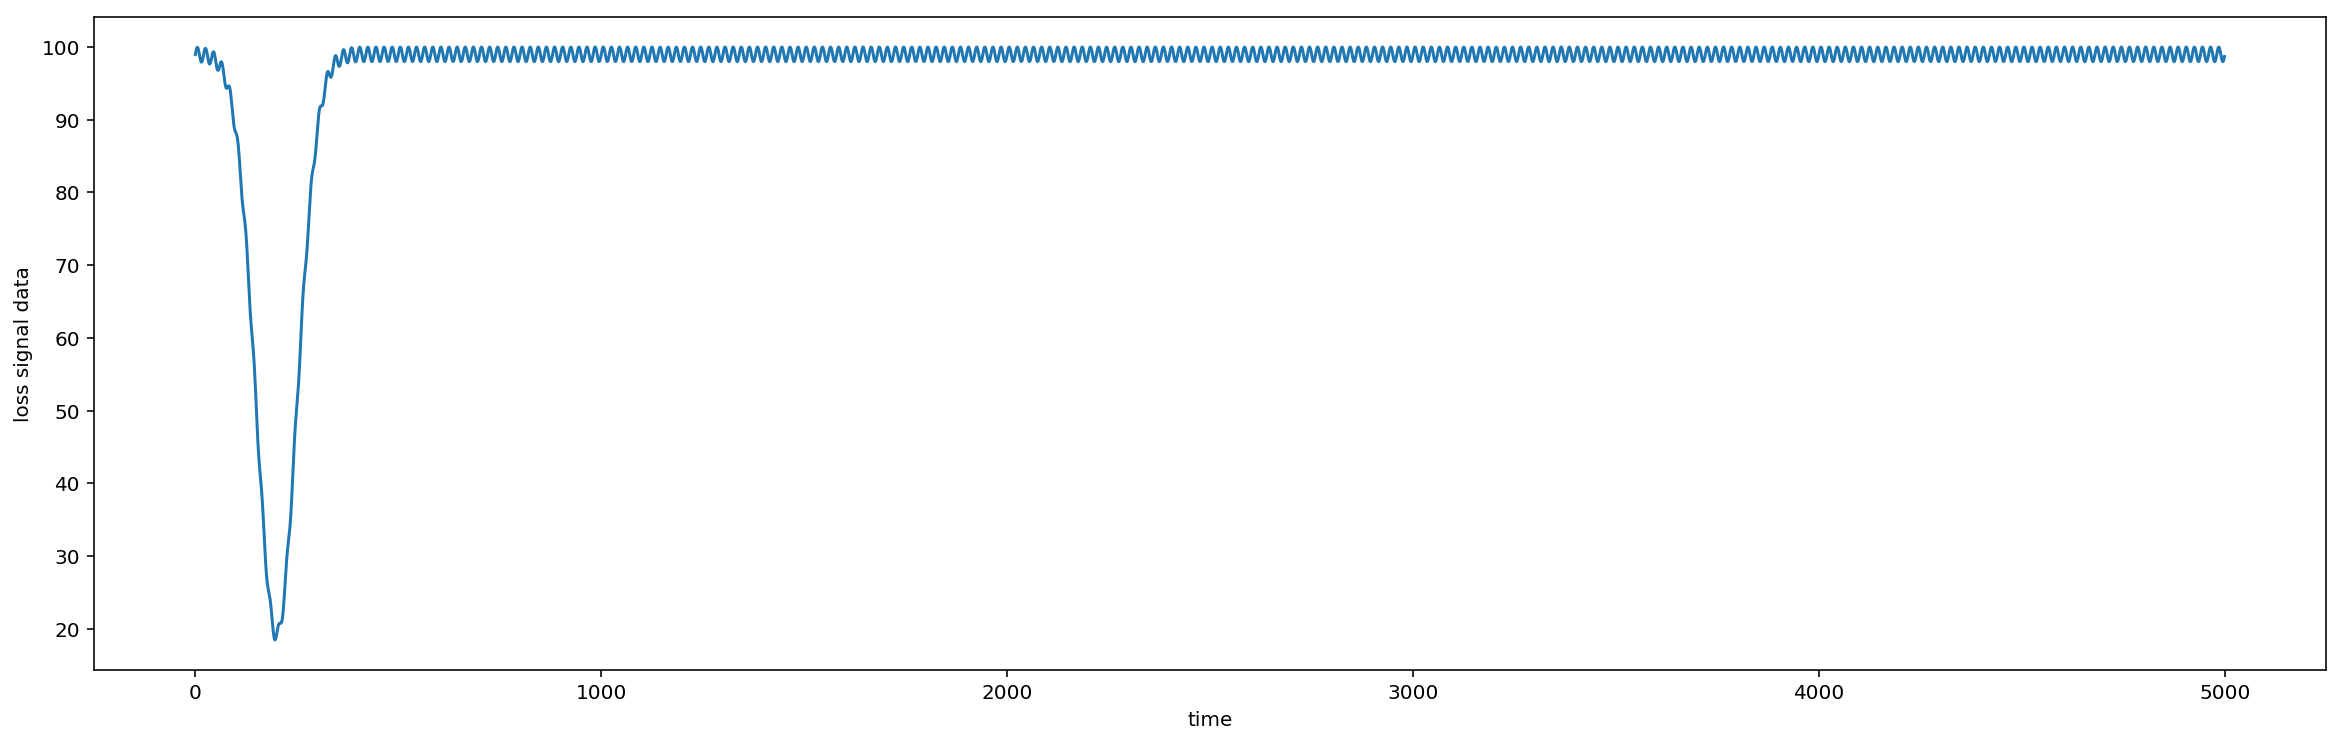

In [12]:
plt.figure(figsize=(20,6))
plt.plot(real)
plt.xlabel('time')
plt.ylabel('loss signal data')

In [13]:
real_max=np.max(real)
real_mean=np.mean(real)
real_min=np.min(real)
real_std=np.std(real)

print('Max of Real signal = '+ str(real_max))
print('Mean of Real signal = '+ str(real_mean))
print('Min of Real signal = '+ str(real_min))
print('Std of Real signal = '+ str(real_std))

Max of Real signal = 99.9758075889917
Mean of Real signal = 96.9601079706395
Min of Real signal = 18.465684491387833
Std of Real signal = 10.456589516378855


# 1.3 Comparing by Graph

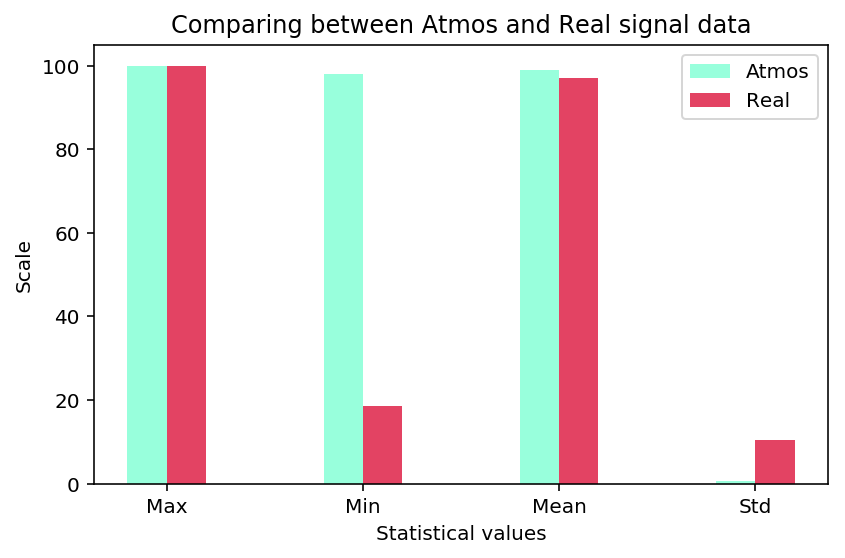

In [14]:
labels=('Max','Min','Mean','Std')
data_at=[at_max, at_min, at_mean, at_std]
data_real=[real_max, real_min, real_mean, real_std]
n_group=4


fig, ax = plt.subplots()
index=np.arange(n_group)
bar_width=.2
opacity=.8

rects1=plt.bar(index, data_at, bar_width, alpha=opacity, color='aquamarine', label='Atmos')
rects2=plt.bar(index+bar_width, data_real, bar_width, alpha=opacity, color='crimson', label='Real')

plt.xlabel('Statistical values')
plt.ylabel('Scale')
plt.title('Comparing between Atmos and Real signal data')
plt.xticks(index+bar_width-.1, labels)
plt.legend()

plt.tight_layout()
plt.show()

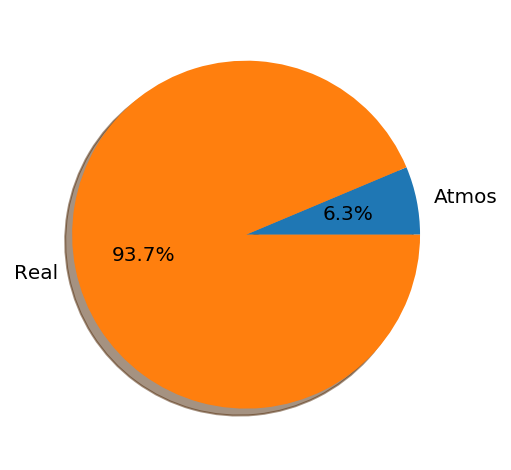

In [15]:
plt.pie([at_std,real_std],labels=['Atmos','Real'],shadow=True, autopct = '%1.1f%%')
plt.show()

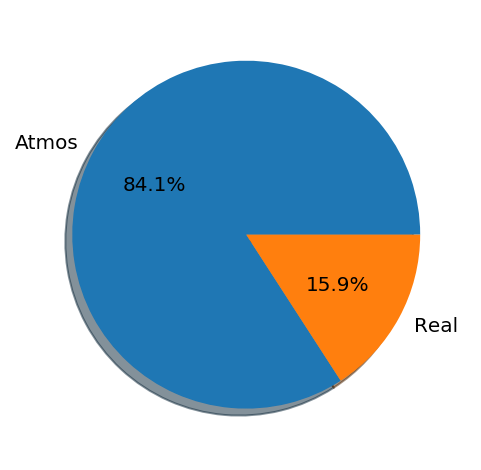

In [16]:
plt.pie([at_min,real_min],labels=['Atmos','Real'],shadow=True, autopct = '%1.1f%%')
 
plt.show()

# 1.4 Distribution

In [17]:
import seaborn as sns

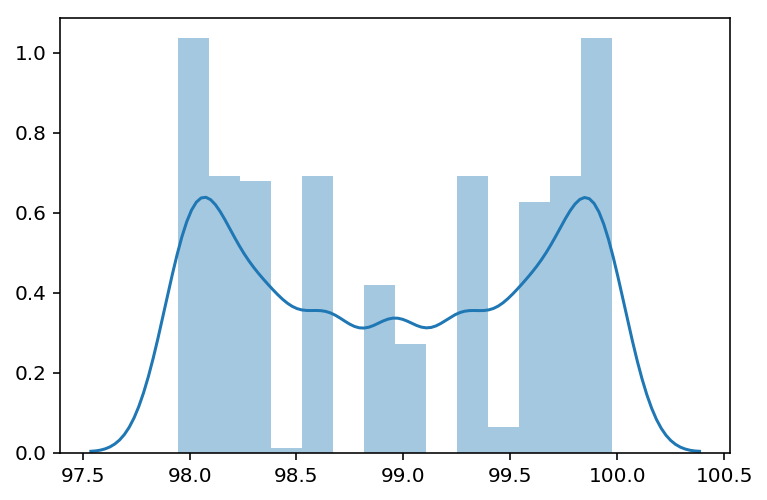

In [18]:
sns.distplot(at)

In [20]:
from scipy.stats import skew , kurtosis
print('Skewness =' +str(skew(at)))
print('Kurtosis =' +str(kurtosis(at)))

Skewness =2.706241831082662e-05
Kurtosis =-1.5001034713214576


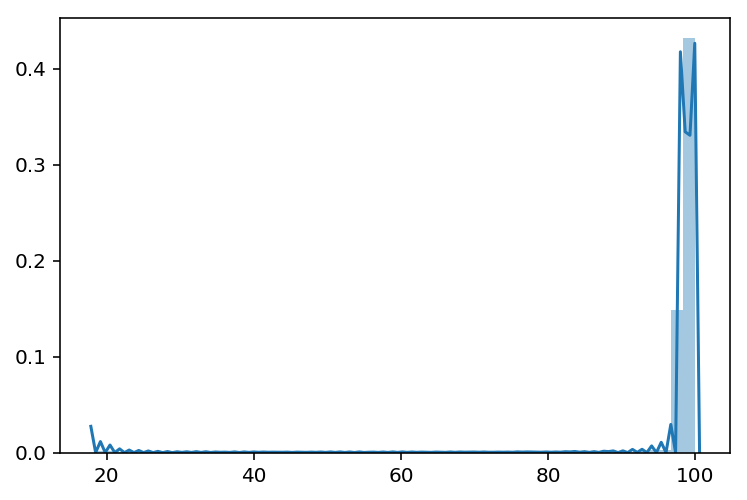

In [21]:
sns.distplot(real)

In [22]:
print('Skewness =' +str(skew(real)))
print('Kurtosis =' +str(kurtosis(real)))

Skewness =-5.851562510011751
Kurtosis =34.81986897633052


# 2. Classification by Machine learning

## 2.1 Isolation Forest

In [27]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=0, contamination=0.1)
clf.fit(real.reshape(-1, 1))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.1,
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=0, verbose=0)

In [29]:
y_train=clf.predict(real.reshape(-1, 1))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [30]:
plt.scatter(y_train,)

TypeError: scatter() missing 1 required positional argument: 'y'

In [ ]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(x.reshape(-1, 1))
xx = np.linspace(-6, 6, 100).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('x')
plt.xlim([-5, 5])
plt.show()

In [ ]:
isolation_forest = IsolationForest(n_estimators=100)

isolation_forest.fit(df['Sales'].values.reshape(-1, 1))
xx = np.linspace(np.min(real), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

In [ ]:
type(real)

In [ ]:
import pandas as pd
pd_real=pd.Series(real)

In [ ]:
pd_real

In [ ]:
type(pd_real)

In [ ]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Sales'].values.reshape(-1, 1))
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['pd_real'].values.reshape(-1, 1))